# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [7]:
from types import SimpleNamespace

import numpy as np
from scipy import optimize

import pandas as pd 
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

In [4]:
# Model

model = inauguralproject.HouseholdSpecializationModelClass()

# first we define a list for alpha and sigma

alpha = [0.25, 0.50, 0.75]
sigma = [0.5,1.0,1.5]
for i in alpha:
    model.par.alpha = i
    model.solve_discrete(do_print=True)
for j in sigma:
    model.par.sigma = j
    model.solve_discrete(do_print=True)


LM = 2.0000
HM = 6.5000
LF = 7.0000
HF = 2.0000
LM = 4.5000
HM = 4.5000
LF = 4.5000
HF = 4.5000
LM = 6.5000
HM = 2.0000
LF = 2.5000
HF = 6.5000
LM = 6.5000
HM = 2.0000
LF = 2.5000
HF = 6.5000
LM = 6.5000
HM = 2.0000
LF = 2.5000
HF = 6.5000
LM = 6.5000
HM = 2.0000
LF = 2.5000
HF = 6.5000


In [8]:
# Model - LAVET AF MC 

model = inauguralproject.HouseholdSpecializationModelClass()

# first we define a list for alpha and sigma in the range that we want to examine

alpha_list = [0.25, 0.50, 0.75]
sigma_list = [0.5,1.0,1.5]
# Using the list of values we create a loop such that we test for all values of alpha and all values of sigma together. 
for alpha in alpha_list:
    for sigma in sigma_list:
        # Assigning the values of alpha and sigma to our model
        model.par.alpha = alpha
        model.par.sigma = sigma
# Using our solve model for discrete time
        opt = model.solve_discrete()
# Printing the results
        print(f'alpha = {alpha:.2f}, sigma = {sigma:.2f} -> HF/HM = {opt.HF:.2f}/{opt.HM:.2f} = {opt.HF/opt.HM:.2f}')

alpha = 0.25, sigma = 0.50 -> HF/HM = 2.00/6.50 = 0.31
alpha = 0.25, sigma = 1.00 -> HF/HM = 2.00/6.50 = 0.31
alpha = 0.25, sigma = 1.50 -> HF/HM = 2.00/6.50 = 0.31
alpha = 0.50, sigma = 0.50 -> HF/HM = 4.50/4.50 = 1.00
alpha = 0.50, sigma = 1.00 -> HF/HM = 4.50/4.50 = 1.00
alpha = 0.50, sigma = 1.50 -> HF/HM = 4.50/4.50 = 1.00
alpha = 0.75, sigma = 0.50 -> HF/HM = 6.50/2.00 = 3.25
alpha = 0.75, sigma = 1.00 -> HF/HM = 6.50/2.00 = 3.25
alpha = 0.75, sigma = 1.50 -> HF/HM = 6.50/2.00 = 3.25


In [ ]:
HF = 4.5
HM = 4.5
  
result = HF / HM  # Divide using / operator
print("Result:", result)

In [2]:
# New code

model = inauguralproject.HouseholdSpecializationModelClass()

def plot_HF_HM(alpha_vals, sigma_vals):
    """ Plot HF/HM as a function of female wage for different values of alpha and sigma """

    fig, axes = plt.subplots(nrows=len(alpha_vals), ncols=len(sigma_vals), figsize=(10, 8), sharex=True, sharey=True)

    for i, alpha in enumerate(alpha_vals):
        for j, sigma in enumerate(sigma_vals):
            # Set alpha and sigma in model parameters
            model.par.alpha = alpha
            model.par.sigma = sigma

            # Solve model discretely
            opt = model.solve_discrete()

            # Calculate HF/HM
            HF_HM = opt.HF / opt.HM

            # Plot HF/HM as a function of female wage
            axes[i, j].plot(model.par.wF_vec, HF_HM*np.ones(model.par.wF_vec.size), 'b--')
            axes[i, j].set_xlabel('Female wage')
            axes[i, j].set_ylabel('HF/HM')
            axes[i, j].set_title(r'$\alpha={}$, $\sigma={}$'.format(alpha, sigma))

    # Add common x and y labels
    fig.add_subplot(111, frameon=False)
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.grid(False)
    plt.xlabel('Female wage')
    plt.ylabel('HF/HM')

    plt.tight_layout()
    plt.show()

/Users/bruger/Documents/Documents/Introduction to programming and numerical analysis/projects-2023-mej/inauguralproject/inauguralproject.py:61: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


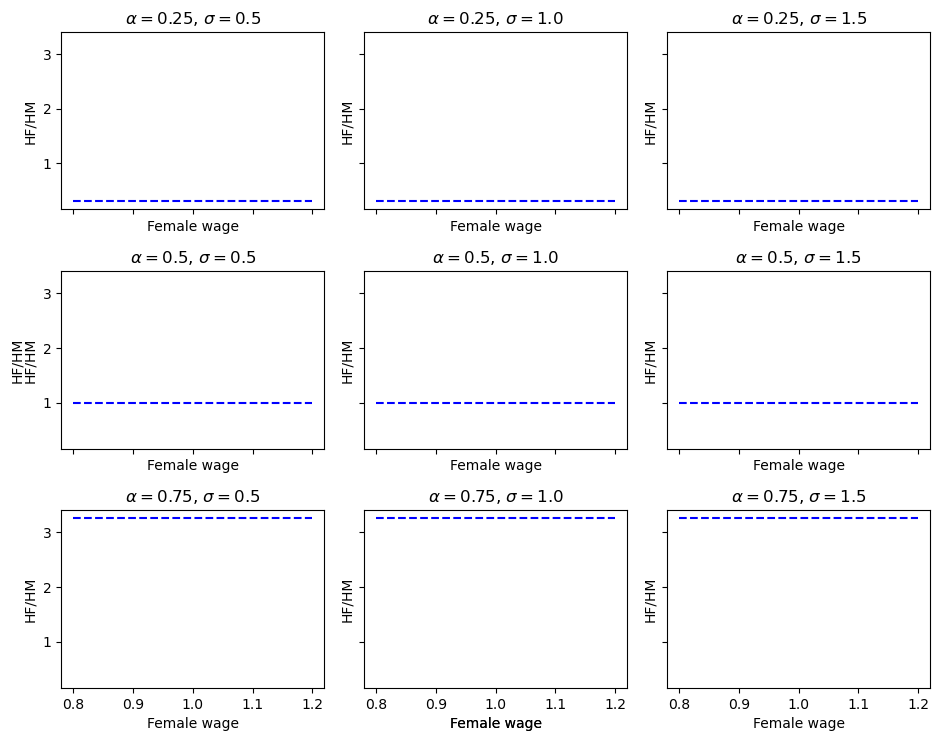

In [3]:
alpha_vals = [0.25, 0.5, 0.75]
sigma_vals = [0.5, 1.0, 1.5]

model = inauguralproject.HouseholdSpecializationModelClass()
plot_HF_HM(alpha_vals, sigma_vals)

# Question 2

Explain your code and procedure

In [ ]:
# code



fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

ax.plot(x_vec,f_vec,ls='--',lw=2,color='black',label='$f(x)$')
ax.plot(x_best,f_best,ls='',marker='s',label='best')

ax.set_xlabel('x')
ax.set_ylabel('f')
ax.legend(loc='lower center',frameon=True);

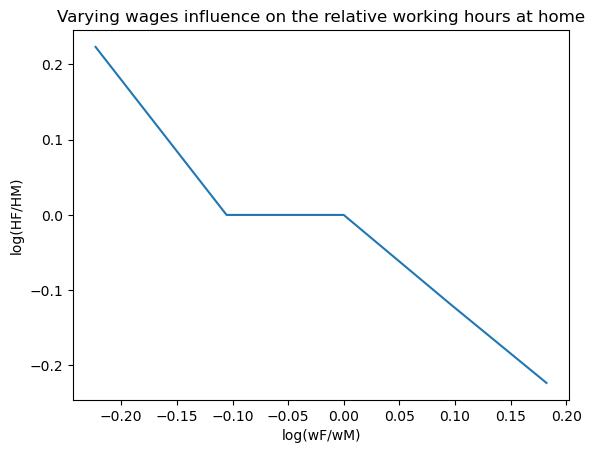

In [10]:
# LAVET AF MC vi
model = inauguralproject.HouseholdSpecializationModelClass()

#Define the vector for the wage rates
wf = model.par.wF_vec

# We then create an empty list to store the results of the optimal labour supply
q2_ratio = np.zeros_like(wf)

# We create a loop over the wages and find the optimal labour supply for each wage
for i, wage in enumerate(wf):
    model.par.wF = wage
    opt = model.solve_discrete()
    ratio = opt.HF/opt.HM
    q2_ratio[i] = ratio

# Creating a plot of the results
plt.plot(np.log(wf), np.log(q2_ratio))
plt.xlabel("log(wF/wM)")
plt.ylabel("log(HF/HM)")
plt.title("Varying wages influence on the relative working hours at home")

plt.show()

# Question 3

Explain your code and procedure

In [ ]:
# code

ADD CONCISE CONLUSION.